# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model  
import matplotlib.pyplot as plt

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here.
ages = [17,51,27,21,36,48,19,26,54,30]
times_late = [10,1,5,9,4,2,9,6,0,3]

student_data = pd.DataFrame({'Age': ages, 'Tardies': times_late})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

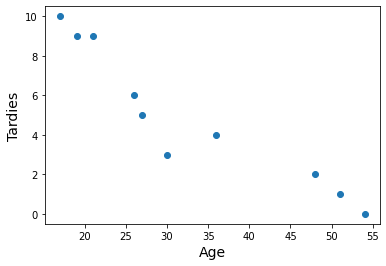

In [4]:
# Your code here.
plt.scatter(student_data.Age, student_data.Tardies)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Tardies', fontsize = 14)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# We can visually identify a trend as the higher the age, the lower the delayed times. 
# This meakes us hypothesize that Age and Tardies are negatively correlated.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
#correlation:
print('correlation =', np.corrcoef(student_data.Age, student_data.Tardies)[0][1])

#covariance:
print('covariance =', np.cov(student_data.Age, student_data.Tardies)[0][1])

correlation = -0.9391626886887122
covariance = -45.56666666666667


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# Your response here.
model = linear_model.LinearRegression()
  
# x = independent variable
# y = dependent variable
model.fit(student_data[['Age']], student_data['Tardies']) 
r2 = model.score(student_data[['Age']], student_data['Tardies'])
print('R2 =', r2)

# I am using a linear regression method, which is normally used 
# when only one X (independent) variable is used to predict the outcome variable. 
# In this case the independent variable is the Age, and the outcome variable is 
# the late frequency.

R2 = 0.8820265558250109


Plot your regression model on your scatter plot.

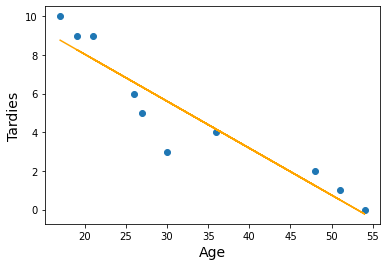

In [10]:
# Your code here.
regression_line = model.intercept_ + model.coef_[0] * student_data[['Age']]
regression_line
plt.plot(student_data['Age'].values, regression_line['Age'].values, c='orange')
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Tardies', fontsize = 14)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# The linear regression analysis indicates that a correlation between Age and Tardies indeed
# exists. The slope of the line tells us that the correlation is negative, meaning that the 
# two variables are correlated in opposite directions (as one increases, the other decreases). 
# The R2, that measures the accuracy of the model, tells us that it is a strong correlation: 
# not perfectly linear (r2 = 1) but close (r2= .88). Based on this analysis, the model can 
# do good predictions about the probability of being late according to age.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [12]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head(4)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [31]:
# Your response here. 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']


R2 = 0.9808734920269122


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [13]:
# Your response here. 
X = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicles['CO2 Emission Grams/Mile']

model = linear_model.LinearRegression()
model.fit(X,y)   

r2 =model.score(X,y)
print('R2 =', r2)

R2 = 0.9808734920269122


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [40]:
# Your code here.
invited = [1,3,4,6,8,9,11,14]
attended = [1,2,4,4,5,7,8,13]
party = pd.DataFrame([invited, attended]).T
party = party.rename(columns={0:'invited', 1:'attended'})
party

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [41]:
model = linear_model.LinearRegression()
  
# x = independent variable
# y = dependent variable
model.fit(party[['invited']], party['attended']) 
r2 = model.score(party[['invited']], party['attended'])
print('R2 =', r2)

R2 = 0.9316696375519905


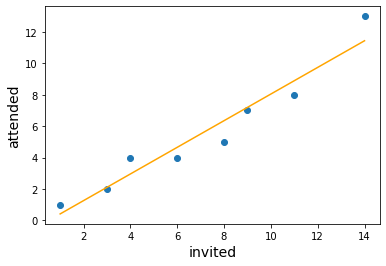

In [42]:
# Your code here.
plt.scatter(party[['invited']], party['attended'])
plt.xlabel('invited', fontsize = 14)
plt.ylabel('attended', fontsize = 14)

regression_line = model.intercept_ + model.coef_[0] * party[['invited']]
regression_line

plt.plot(party['invited'], regression_line['invited'], c='orange')

plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [43]:
# Your response here. 
# A high positive correlation exists between the number of invited and 
# the number of attending people. We can see this correlation from the R2 score, 
# which is close to 1 and from the regression line.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

<function matplotlib.pyplot.show(close=None, block=None)>

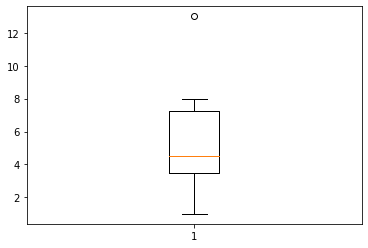

In [48]:
# Your response here. 
# To check if there are outliers I do the boxplot
plt.boxplot(x=party['attended'])
plt.show

In [54]:
# To check the value of the outliers
whisker = (np.quantile(party['attended'], .75) - np.quantile(party['attended'], .25) * 1.5) + np.quantile(party['attended'], .75)

party[party['attended'] > whisker]

,invited,attended
7,14,13


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [56]:
# Your response here. 
party_selected = party[party['attended'] <= whisker]

In [57]:
party_selected

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [58]:
# Party R2
print('R2 =', r2)

R2 = 0.9316696375519905


In [59]:
model = linear_model.LinearRegression()
  
# x = independent variable
# y = dependent variable
model.fit(party_selected[['invited']], party_selected['attended']) 
r2_sel = model.score(party_selected[['invited']], party_selected['attended'])
print('R2 =', r2_sel)

R2 = 0.9433811802232854


In [ ]:
# After removing the outlier the score increases, meaning that model is fitting better the 
# real data. However to remove or not the outlier should be carefully considered based also on 
# other criteria such as the size of the sample and the relevance of the values,
# not only based on the performance of the model. 